In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
from IPython.display import clear_output
import time
import pylab as pl
from IPython import display

# K-Means
[Visualization of K-Means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
np.random.seed(123)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))
y = np.array([1]*100 + [2]*100 + [3]*100)

In [ ]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

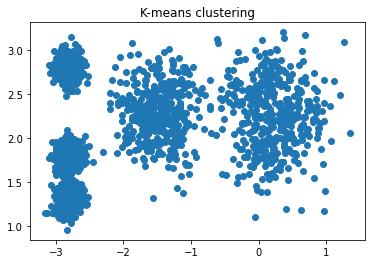

In [ ]:
#k_means = KMeans(n_clusters = 3, random_state=0, max_iter=2)
#k_means = k_means.fit(X)
#clusters = k_means.predict(X)
plt.scatter(X[:,0], X[:,1]) #, c = clusters)
#plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], c='r', marker='8')
plt.title('K-means clustering')
plt.show()

In [ ]:
n_clust = 5
import random
init_index = random.sample(range(X.shape[0]), n_clust)
init_centers = X[init_index]
init_centers

array([[-1.7782848 ,  2.95625523],
       [-2.7876134 ,  1.27965603],
       [-2.99575942,  1.29303633],
       [-2.70544971,  1.50231445],
       [-0.54703069,  2.43522038]])

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


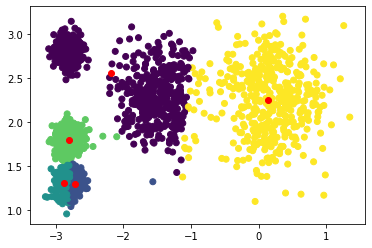

Inertia: 600.3886523492702


<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):
   display.clear_output(wait=True)
   #k_means = KMeans(n_clusters = n_clust, random_state=0, max_iter=i+1)
   k_means = KMeans(n_clusters = n_clust, init=init_centers, max_iter=i+1)
   k_means = k_means.fit(X)
   clusters = k_means.predict(X)
   plt.scatter(X[:,0], X[:,1], c = clusters)
   plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], c='r')
   display.display(pl.gcf())
   print(f"Inertia: {k_means.inertia_}")
   plt.clf()
   time.sleep(1.0)
   

In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


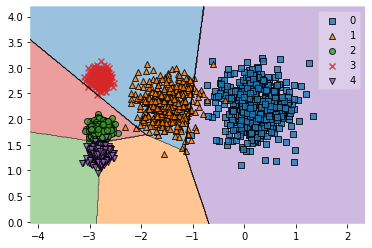

In [ ]:
plot_decision_regions(X,y,k_means)

# DBSCAN
[Visualization of DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

Example: clustering of geographical data.

<p><a href="https://commons.wikimedia.org/wiki/File:DBSCAN-Illustration.svg#/media/Файл:DBSCAN-Illustration.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/1200px-DBSCAN-Illustration.svg.png" alt="DBSCAN-Illustration.svg" width="500" height="350"> </a><br> <a href="https://en.wikipedia.org/wiki/DBSCAN" title="User:Chire">Source</a> The following code is based on <a href="https://github.com/hse-ds/iad-intro-ds/blob/master/2021/seminars/sem17_clustering.ipynb">this notebook.</a>

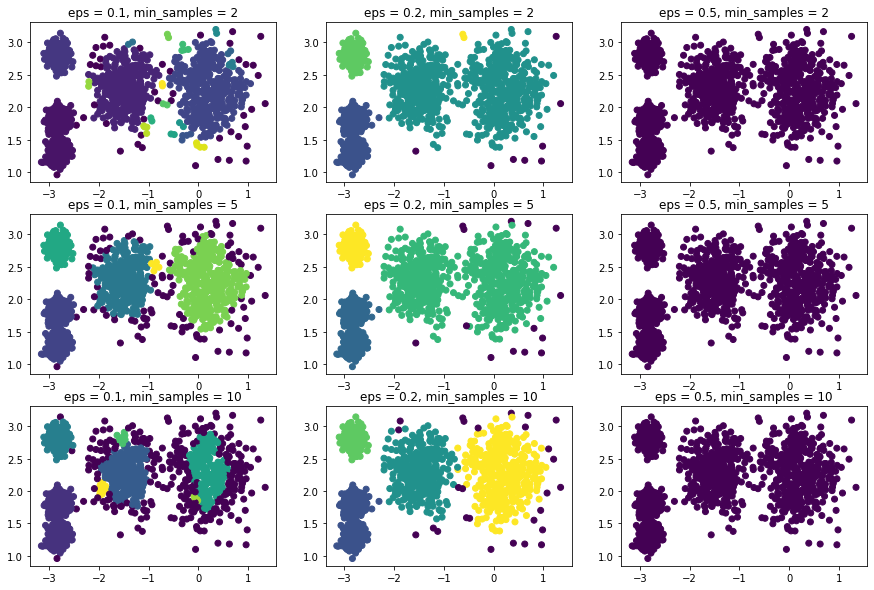

In [ ]:
from sklearn.cluster import DBSCAN
plt.figure(figsize= (15,10))
i = 1
for samples in [2, 5, 10]:
    for e in [0.1, 0.2, 0.5]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        plt.subplot(3, 3, i)
        plt.scatter(X[:,0], X[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    #i+=1

plt.show()

# Hierarchical clustering
* Agglomerative
* Divisive

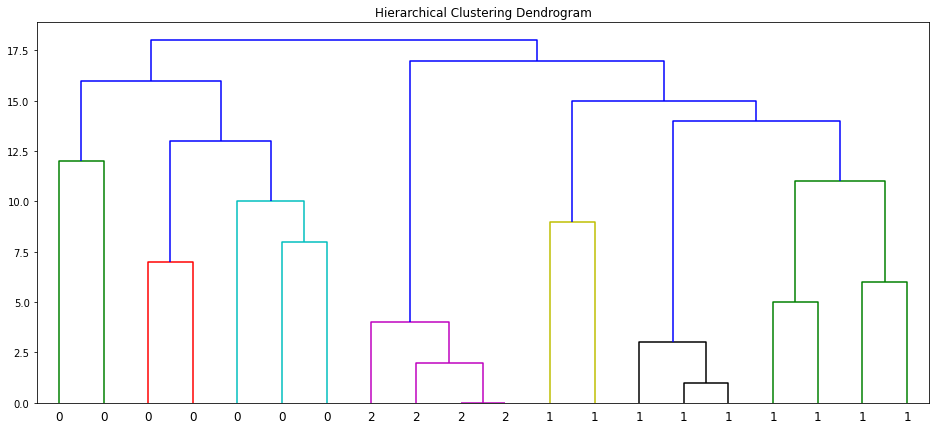

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X_agg = iris.data[:20]
model = AgglomerativeClustering(n_clusters=3)

model = model.fit(X_agg)

# Children of hierarchical clustering
children = model.children_

# Distances between each pair of children
# Since we don't have this information, we can use a uniform one for plotting
distance = np.arange(children.shape[0])

# The number of observations contained in each cluster level
no_of_observations = np.arange(2, children.shape[0]+2)

# Create linkage matrix and then plot the dendrogram
# linkage matrix format: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
plt.figure(figsize=(16,7))
dendrogram(linkage_matrix, labels=model.labels_)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Text(0.5, 1.0, 'Data')

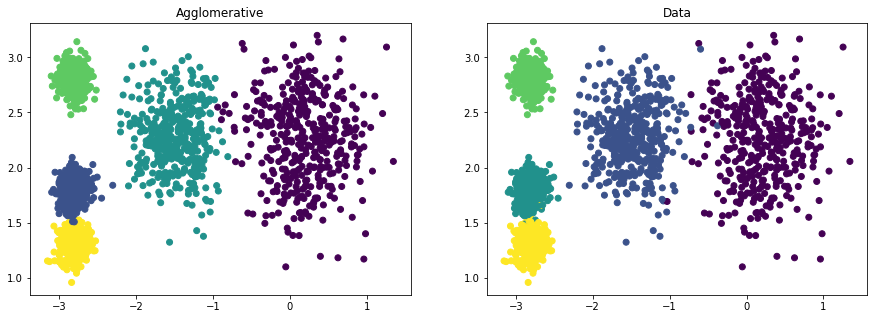

In [ ]:
agg = AgglomerativeClustering(n_clusters=5)
clusters = agg.fit_predict(X)
plt.figure(figsize= (15,5))
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c = clusters)
plt.title('Agglomerative')
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c = y)
plt.title('Data')

Optimal number of classes

In [ ]:
img = plt.imread('https://raw.githubusercontent.com/iad34/seminars/master/materials/apple.png')
img.shape

(237, 316, 3)

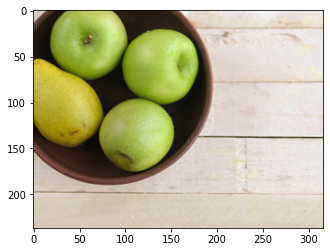

In [ ]:
plt.imshow(img)

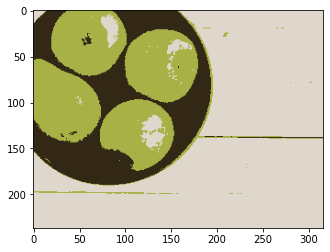

In [ ]:
X = img.reshape(-1, 3)
cls = KMeans(3)
cls.fit(X)
segmented_img = cls.cluster_centers_[cls.labels_]
plt.imshow(segmented_img.reshape(img.shape))

# Gaussian Mixture
We can use the mixture of $K$ models with their own parameters $\theta_k,$ $k=1,\ldots,K$:
$$
p(x) = \pi_1 p(x|\theta_1) +\ldots + \pi_K p(x|\theta_K),\quad \sum\limits_{k=1}^K \pi_k =1.
$$
In case of Gaussian models, $\theta_k=(\mu_k, \Sigma_k)$ and 
$$
p(x|\theta_k) = N(x|\mu_k,\ \Sigma_k) = \frac{1}{\sqrt{(2\pi)^d |\Sigma_k|}} e^{-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)}.
$$

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html">sklearn.mixture.GaussianMixture</a>


**.weights_** returns $\pi_k$

**.predict_proba** reterns _normalized (!)_ $p(x|\theta_k)$

**.score_samples** returns negative natural $-\log p(x)$

**.means_** and **.covariances_** return $\mu_k$ and $\Sigma_k$

**.predict** returns $\operatorname{argmax} \pi_k$ - the class with higher weight.

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler().fit(X)

In [ ]:
gm = GaussianMixture(n_components=5, random_state=0).fit(sc.transform(X))

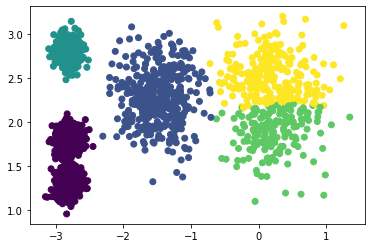

In [ ]:
plt.scatter(X[:,0], X[:,1], c = gm.predict(sc.transform(X)))

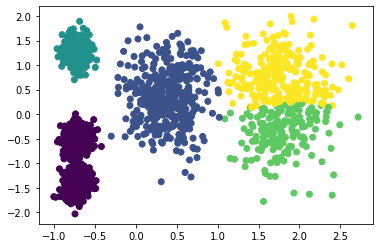

In [ ]:
X_sc = sc.transform(X)
plt.scatter(X_sc[:,0], X_sc[:,1], c = gm.predict(X_sc))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  # This is added back by InteractiveShellApp.init_path()


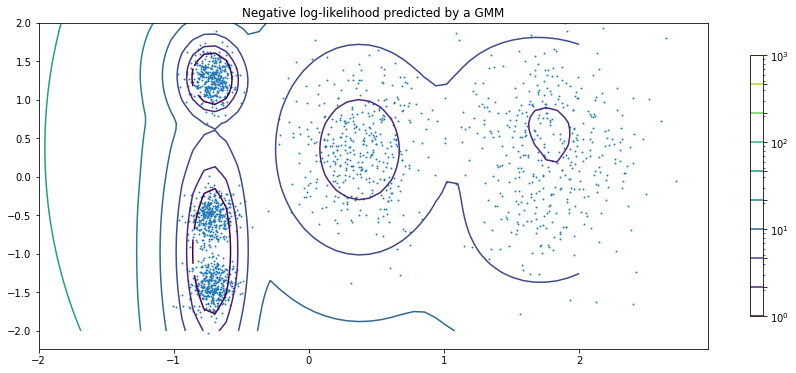

In [ ]:
#From https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html
from matplotlib.colors import LogNorm
x = np.linspace(-2.0, 2.0)
y = np.linspace(-2.0, 2.0)
X_gr, Y_gr = np.meshgrid(x, y)
XX = np.array([X_gr.ravel(), Y_gr.ravel()]).T
Z = -gm.score_samples(XX)
Z = Z.reshape(X_gr.shape)

plt.figure(figsize= (15,6))
CS = plt.contour(
    X_gr, Y_gr, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_sc[:, 0], X_sc[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()

In [ ]:
Xt=np.array([[1,1]])

In [ ]:
gm.score_samples(Xt)

array([-4.35569828])

In [ ]:
np.exp(gm.score_samples(Xt))

array([0.01283348])

In [ ]:
gm.weights_

array([0.40016752, 0.19962393, 0.19975259, 0.08698372, 0.11347224])

In [ ]:
from scipy.stats import multivariate_normal

In [ ]:
s = 0
for i in range(len(gm.means_)):
  s += gm.weights_[i]*multivariate_normal.pdf(Xt, mean=gm.means_[i], cov=gm.covariances_[i])

In [ ]:
s

0.012833475050581165

Problems from the texbook: https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb